# Feedforward Neural Network

● Imports :

In [623]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

● Récupération des données du fichier 'data_ffnn_3classes.txt' dans 2 dataframe (inputs = données référence / results = résultats)

In [624]:
data = pd.read_csv('data_ffnn_3classes.txt', names=['x1','x2','y'], sep=" ")
X = data.drop(columns=['y'])
Y = pd.get_dummies(data['y'], columns=['y'])
display(X.head())
display(Y.head())

,x1,x2
0,1.9643,4.5957
1,2.2753,3.8589
2,2.9781,4.5651
3,2.9320,3.5519
4,3.5772,2.8560


,0.0,1.0,2.0
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


  ●   Fonction d'activation et sa dérivée :

In [625]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidPrime(x):
    return x * (1 - x)

● Détermination des dimensions (I = nombre de tuple, N = nombre de features, J = nombre de output layers, K = nombre de hidden layers) :

In [626]:
I = len(X)
N = len(X.columns)
J = len(Y.columns)
K = 5

● Initialisation des poids (V = hidden layer, W = output layer) :

In [627]:
def init() :
    # poids des hidden layer
    V = np.random.randn(N+1, K)

    # poids des output layer
    W = np.random.randn(K+1, J)
    
    return V, W

● Fonction d'ajout de biai dans une matrice :

In [628]:
def addBiais(x, biai):
    x = np.append(np.ones([len(x), biai]), np.array(x), axis = 1)
    return x

● Initialisation des biais :

In [629]:
# biais
V0 = 1
W0 = 1

● Fonction Feed-Forward Propagation :

In [630]:
def FFNN(X, V, W) :

    # Ajout du biais sur les input layers :
    X_bar = addBiais(X, V0)

    # x̄ fois le poids :
    X_bar_bar = np.dot(X_bar, V)
    #print("X_bar_bar =", X_bar_bar.shape)
    
    # Fonction d'activation vers les hidden layers :
    F = sigmoid(X_bar_bar)
    #print("F =", F.shape)

    # Ajout du biais sur les hidden layers :
    F_bar = addBiais(F, W0)

    # f_bar X le poids :
    F_bar_bar = np.dot(F_bar, W)
    #print("F_bar_bar =", F_bar_bar.shape)
    
    # Fonction d'activation vers les output layers :
    G = sigmoid(F_bar_bar)
    #print("G =", G.shape)
    
    return X_bar, X_bar_bar, F, F_bar, F_bar_bar, G

● Fonction Backpropagation :

In [634]:
def BP(X_bar, X_bar_bar, F, F_bar, F_bar_bar, G, W, V) :
    
    # Erreur
    err = G - Y
    E = (1/2)*np.sum((G - Y)**2)
    
    # Dérivée partielle de l'erreur en fonction de W
    errW = W
    for k in range(K) :
        for j in range(J) :
            x = 0
            for i in range(I) :
                x += (G[i][j] - np.array(Y)[i][j]) * sigmoidPrime(G[i][j]) * F[i][k]
            errW[k][j] = x
    
    # Dérivée partielle de l'erreur en fonction de V
    errV = V
    for k in range(K) :
        for n in range(N) :
            x = 0
            for i in range(I) :
                y = 0
                for j in range(J) :
                    y += (G[i][j] - np.array(Y)[i][j]) * sigmoidPrime(G[i][j]) * W[k][j] * sigmoidPrime(F[i][k]) * np.array(X)[i][n]
                x += y
            errV[n][k] = x
    
    # Modification des poids :
    V -= 0.001 * errV
    
    W -= 0.001 * errW
    
    return E, errV, errW, V, W

● Apprentissage :

In [650]:
iteration = 100

In [651]:
Erreur = []
ErreurV = []
ErreurW = []
V, W = init()

for i in range(iteration) :
    X_bar, X_bar_bar, F, F_bar, F_bar_bar, G = FFNN(X, V, W)
    err, errV, errW, V, W = BP(X_bar, X_bar_bar, F, F_bar, F_bar_bar, G, W, V)
    Erreur.append(err)
    ErreurV.append(errV)
    ErreurW.append(errW)

In [652]:
print(Erreur)

[0.0     8.630586
1.0    11.758345
2.0     5.911168
dtype: float64, 0.0     8.742119
1.0    24.219770
2.0     7.684510
dtype: float64, 0.0     9.801655
1.0    14.513064
2.0    12.301949
dtype: float64, 0.0    13.667153
1.0    24.992660
2.0    25.415218
dtype: float64, 0.0    8.840866
1.0    9.285340
2.0    8.849299
dtype: float64, 0.0     8.876695
1.0    23.467882
2.0    12.113650
dtype: float64, 0.0    14.904421
1.0    23.394251
2.0    25.499988
dtype: float64, 0.0     8.564176
1.0    22.063651
2.0     8.782306
dtype: float64, 0.0    10.898643
1.0    15.548975
2.0     6.687572
dtype: float64, 0.0    20.306026
1.0    24.966989
2.0    25.368871
dtype: float64, 0.0    8.971545
1.0    9.356185
2.0    8.940972
dtype: float64, 0.0    14.719863
1.0    23.034388
2.0    14.655546
dtype: float64, 0.0    20.481692
1.0    23.759455
2.0    25.498782
dtype: float64, 0.0     8.821330
1.0    17.990188
2.0     8.784553
dtype: float64, 0.0    18.916406
1.0    24.885151
2.0    13.810582
dtype: float64, 

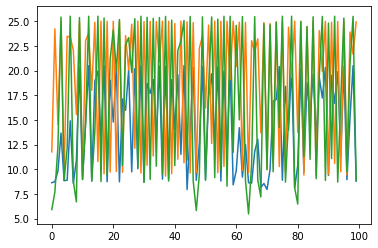

In [653]:
plt.plot(Erreur)
plt.show()